In [ ]:
#https://leimao.github.io/blog/Bounding-Box-Encoding-Decoding/
#https://d2l.ai/chapter_computer-vision/bounding-box.html
#https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_computer-vision/anchor.ipynb#scrollTo=Jp-oq8766uyO
#https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=The%20ground-truth%20bounding%20boxes%20%28i.e.%2C%20the%20hand%20labeled,bounding%20boxes%20we%20can%20apply%20Intersection%20over%20Union.
#
#

In [ ]:
from google.colab import drive
drive.mount('/Anchor_BBox')

Mounted at /Anchor_BBox


In [ ]:
#### must do it ###########
!pip install d2l==0.16.1

     |████████████████████████████████| 81kB 6.5MB/s 


In [ ]:
############### must do it #####################
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x55611302c000 @  0x7f58cd9cb615 0x5560da29806c 0x5560da377eba 0x5560da29ae8d 0x5560da38c99d 0x5560da30efe9 0x5560da309b0e 0x5560da29c77a 0x5560da30ee50 0x5560da309b0e 0x5560da29c77a 0x5560da30b86a 0x5560da38d7c6 0x5560da30aee2 0x5560da38d7c6 0x5560da30aee2 0x5560da38d7c6 0x5560da30aee2 0x5560da38d7c6 0x5560da30aee2 0x5560da29c69a 0x5560da30ac9e 0x5560da309e0d 0x5560da29c77a 0x5560da30aa45 0x5560da29c69a 0x5560da30aa45 0x5560da309b0e 0x5560da29c77a 0x5560da30b86a 0x5560da309b0e
     |████████████████████████████████| 846.0MB 19kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
%matplotlib inline
from d2l import tensorflow as d2l
import tensorflow as tf
import matplotlib.pyplot as plt

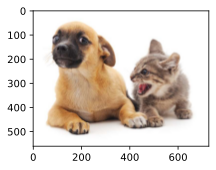

In [ ]:
d2l.set_figsize()
img=plt.imread('/Anchor_BBox/MyDrive/faster_RCNN/catdog.jpg')
plt.imshow(img)

13.3.1. Bounding Box¶

In object detection, we usually use a bounding box to describe the target location. **The bounding box is a rectangular box that can be determined by the [Math Processing Error] and [Math Processing Error] axis coordinates in the upper-left corner and the [Math Processing Error] and [Math Processing Error] axis coordinates in the lower-right corner of the rectangle**.** Another commonly used bounding box representation is the [Math Processing Error] and [Math Processing Error] axis coordinates of the bounding box center, and its width and height**. Here we define functions to convert between these two representations, box_corner_to_center converts from the two-corner representation to the center-width-height presentation, and box_center_to_corner vice verse. The input argument boxes can be either a length [Math Processing Error] tensor, or a [Math Processing Error] 2-dimensional tensor.

In [ ]:
#http://datahacker.rs/tensorflow-constants-and-variables/
#https://www.guru99.com/tensor-tensorflow.html
c1 = tf.constant(5, name = 'x')
c2 = tf.constant(6.0, tf.float32, name = 'y')
c3 = tf.constant(7.0, tf.float32, name = 'z')
print('c1: ', c1)
print('c2: ', c2)
print('c3: ', c3)


c1:  tf.Tensor(5, shape=(), dtype=int32)
c2:  tf.Tensor(6.0, shape=(), dtype=float32)
c3:  tf.Tensor(7.0, shape=(), dtype=float32)


In [ ]:
op1=tf.multiply(c3,c2)
op2=tf.add(c2,c3)
print('multiply of c3(7) & c2(6) : ',op1)
print('addition of c2(6) & c3(7) : ',op2)

multiply of c3(7) & c2(6) :  tf.Tensor(42.0, shape=(), dtype=float32)
addition of c2(6) & c3(7) :  tf.Tensor(13.0, shape=(), dtype=float32)


In [ ]:
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]
print(type(dog_bbox))
dog_bbox=tf.constant(dog_bbox)
print(type(dog_bbox))


<class 'list'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
tensor=tf.convert_to_tensor(5,tf.float32)
print('tensor  ',tensor)

tensor   tf.Tensor(5.0, shape=(), dtype=float32)


**Centroids Representation**

A bounding box could be represented as  **[x,  y,  w ,  h]** , where  and  are the coordinates of the bounding box centroid,  and  are the width and height of the bounding box.

**Corners Representation**

A bounding box could also be represented as  **[Xmin  ,  Xmax , Ymin ,  Ymax ]**,  where  and  are the coordinates of the bounding box bottom-left corner,  and  are the coordinates of the bounding box top-right corner.

**MinMax Representation**

Similar to the corner representation, a bounding box could also be represented as **[Xmin  ,Xmax  ,Ymin  ,Ymax ]**, where  and  are the minimum and maximum of the  coordinates, and  and  are the minimum and maximum of the  coordinates. It is almost identical to the corner representation.

In [ ]:
# bbox is the abbreviation for bounding box
#this is Corners Representation
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

In [ ]:
boxes = tf.constant((dog_bbox, cat_bbox))
print('bbox : \n',boxes)
print('###########################################################')
print('boxes[:,0] : ',boxes[:,0])
print('boxes[:,1] : ',boxes[:,1])
print('boxes[:,2] : ',boxes[:,2])
print('boxes[:,3] : ',boxes[:,3])
print('###########################################################')
print(box_center_to_corner(box_corner_to_center(boxes)))

bbox : 
 tf.Tensor(
[[ 60.  45. 378. 516.]
 [400. 112. 655. 493.]], shape=(2, 4), dtype=float32)
###########################################################
boxes[:,0] :  tf.Tensor([ 60. 400.], shape=(2,), dtype=float32)
boxes[:,1] :  tf.Tensor([ 45. 112.], shape=(2,), dtype=float32)
boxes[:,2] :  tf.Tensor([378. 655.], shape=(2,), dtype=float32)
boxes[:,3] :  tf.Tensor([516. 493.], shape=(2,), dtype=float32)
###########################################################
tf.Tensor([ 60. 400.], shape=(2,), dtype=float32)  ,  tf.Tensor([ 45. 112.], shape=(2,), dtype=float32)  ,  tf.Tensor([378. 655.], shape=(2,), dtype=float32)  ,  tf.Tensor([516. 493.], shape=(2,), dtype=float32)
tf.Tensor(
[[ 60.  45. 378. 516.]
 [400. 112. 655. 493.]], shape=(2, 4), dtype=float32)


In [ ]:
#this will be Centroids Representation
#teke input as (x1,y1,x2,y2) but return (center_x,center_y,width,height) 
def box_corner_to_center(bbox):
  #Convert from (upper_left, bottom_right) to (center, width, height)
  x1,x2,y1,y2=bbox[:,0],bbox[:,1],bbox[:,2],bbox[:,3]
  print('inside box_corner_to_center : \n',bbox[:,0],' , ',bbox[:,1],' , ',bbox[:,2],' , ',bbox[:,3])
  cx=(x1+x2)/2
  cy=(y1+y2)/2
  w=x2-x1
  h=y2-y1
  #https://docs.w3cub.com/tensorflow~python/tf/stack
  #The axis to stack along.Defaults the first dimension.Negative values wrap around,so the valid range is [-(R+1), R+1)
  bboxes=tf.stack((cx,cy,w,h),axis=-1)
  return bboxes


#this will be MinMax Representation
def box_center_to_corner(bbox):
  cx,cy,w,h=bbox[:,0],bbox[:,1],bbox[:,2],bbox[:,3]
  print('inside box_center_to_corner : \n','cx:',cx,' ,cy:',cy,' ,w:',w,' ,h:',h)
  x1=cx - 0.5 * w
  x2=cx + 0.5 * w
  y1=cy - h/2
  y2=cy + 0.5 * h
  #https://docs.w3cub.com/tensorflow~python/tf/stack
  #The axis to stack along.Defaults the first dimension.Negative values wrap around,so the valid range is [-(R+1), R+1)
  bbox=tf.stack((x1,y1,x2,y2),axis=-1)
  return bbox



In [ ]:
#this is Corners Representation
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]
bbox=tf.constant((dog_bbox,cat_bbox))
print('bbox : \n',bbox)
###########  call only box_corner_to_center function ################
a=box_corner_to_center(bbox)
print('inside box_corner_to_center : \n',a)

bbox : 
 tf.Tensor(
[[ 60.  45. 378. 516.]
 [400. 112. 655. 493.]], shape=(2, 4), dtype=float32)
inside box_corner_to_center : 
 tf.Tensor([ 60. 400.], shape=(2,), dtype=float32)  ,  tf.Tensor([ 45. 112.], shape=(2,), dtype=float32)  ,  tf.Tensor([378. 655.], shape=(2,), dtype=float32)  ,  tf.Tensor([516. 493.], shape=(2,), dtype=float32)
inside box_corner_to_center : 
 tf.Tensor(
[[  52.5  447.   -15.   138. ]
 [ 256.   574.  -288.  -162. ]], shape=(2, 4), dtype=float32)


In [ ]:
########### Call box_center_to_corner inside the box_corner_to_center function#########
a=box_center_to_corner(box_corner_to_center(bbox))
print('Call box_center_to_corner inside the box_corner_to_center function : \n',a)

inside box_corner_to_center : 
 tf.Tensor([ 60. 400.], shape=(2,), dtype=float32)  ,  tf.Tensor([ 45. 112.], shape=(2,), dtype=float32)  ,  tf.Tensor([378. 655.], shape=(2,), dtype=float32)  ,  tf.Tensor([516. 493.], shape=(2,), dtype=float32)
inside box_center_to_corner : 
 cx: tf.Tensor([ 52.5 256. ], shape=(2,), dtype=float32)  ,cy: tf.Tensor([447. 574.], shape=(2,), dtype=float32)  ,w: tf.Tensor([ -15. -288.], shape=(2,), dtype=float32)  ,h: tf.Tensor([ 138. -162.], shape=(2,), dtype=float32)
Call box_center_to_corner inside the box_corner_to_center function : 
 tf.Tensor(
[[ 60. 378.  45. 516.]
 [400. 655. 112. 493.]], shape=(2, 4), dtype=float32)


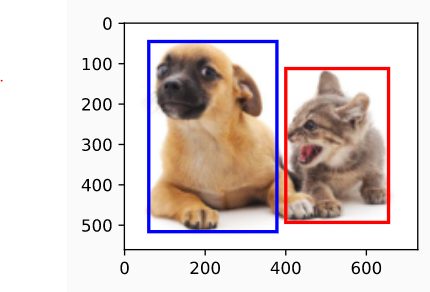

In [ ]:
def bbox_to_rect(bbox,color):
  #Convert bounding box to matplotlib format.
  #convert the bounding box(top left x,top left y,bootom right x,bottom right y) format to matplotlib
  #format : ((upper left x,upper left y),width, height)
  #***************************************************************************************************
  #@docstring.dedent_interpd def __init__(xy, width, height, angle=0.0, **kwargs)
  #A rectangle with lower left at xy = (x, y) with specified width, height and rotation angle.
  return d2l.plt.Rectangle(xy=(bbox[0],bbox[1]),width=bbox[2]-bbox[0],height=bbox[3]-bbox[1],fill=False,
                           edgecolor=color,linewidth=2)

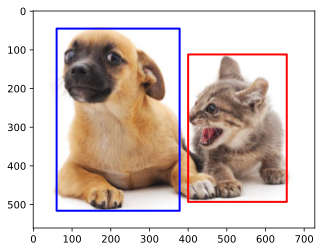

In [ ]:
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]
fig=d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox,'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox,'red'))

In [ ]:
import numpy as np
a=np.random.uniform(size=(1,3,8,9))
a

array([[[[4.34580593e-01, 4.77220161e-01, 5.98331221e-01,
          9.28249753e-01, 5.88351375e-01, 9.16420396e-01,
          6.59144598e-01, 3.60535323e-01, 2.47331111e-01],
         [5.43584866e-01, 3.79545241e-01, 5.44773967e-02,
          4.28712658e-01, 5.44354267e-01, 9.20146444e-01,
          2.64212783e-01, 4.54475502e-01, 2.91045513e-01],
         [5.77830379e-01, 8.35179244e-01, 3.79618170e-01,
          6.80288087e-01, 6.25648830e-01, 3.98041481e-01,
          9.27350568e-01, 4.31464867e-01, 2.41984945e-01],
         [6.95844930e-01, 8.08715818e-01, 8.22762092e-01,
          2.01735394e-01, 6.44885871e-01, 6.52636208e-01,
          8.32073645e-01, 3.50980513e-01, 2.47237613e-01],
         [8.67140855e-01, 7.61825662e-01, 3.78731390e-01,
          1.80597105e-01, 7.61776551e-01, 7.76132705e-01,
          9.28247618e-02, 7.98212621e-01, 7.03020954e-01],
         [3.60426081e-01, 1.25941936e-01, 1.73390323e-01,
          5.86391899e-01, 7.32924786e-01, 9.83539520e-01,
         